In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

def flux(P,rb,x,y,xfocal,yfocal): 
    '''
    Gaussian TEM00 intensity profile
    '''
    rsquared=((x-xfocal)**2)+((y-yfocal)**2)
    q=((2*P)/(numpy.pi*(rb**2)))*numpy.exp(-(2*(rsquared)/(rb**2)))
    return q

def flux2(P,rb,x,y, xfocal, yfocal): 
    '''
    Gaussian function used in Eagar-Tsai model derivation
    '''
    rsquared=((x-xfocal)**2)+((y-yfocal)**2)
    q=(P/(2*numpy.pi*(rb**2)))*numpy.exp(-((rsquared)/(2*(rb**2))))
    return q

In [2]:
P = 5.0 #Watts
rb = 25e-6 #meters

xfocal = 0.0
yfocal = 0.0

xmin = - 2.0 * rb ; xmax = 2.0 * rb
ymin = - 2.0 * rb ; ymax = 2.0 * rb
x = numpy.linspace( xmin, xmax, 100)
y = numpy.linspace( ymin, ymax, 100)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

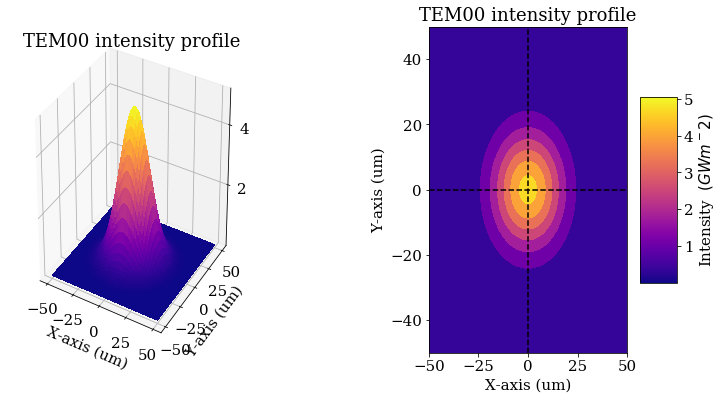

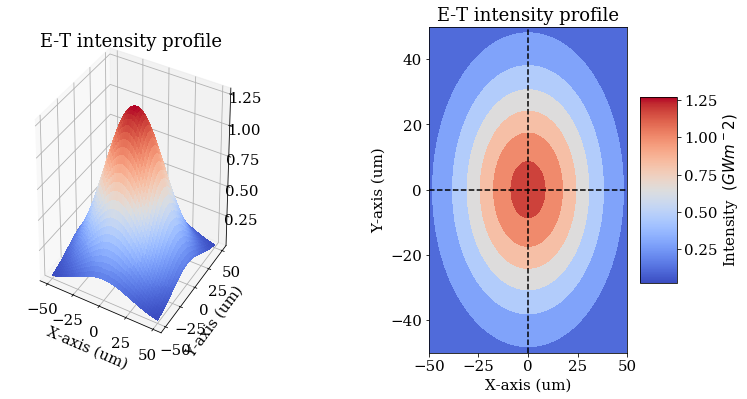

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 15

TEM_fig = pyplot.figure(figsize = (12,6))
ax1_TEM = TEM_fig.add_subplot(1,2,1,projection='3d')
x2, y2 = numpy.meshgrid(x, y)
q1 = flux(P,rb,x2,y2,xfocal,yfocal)
surf1 = ax1_TEM.plot_surface(x2*1e6, y2*1e6, q1*1e-9, cmap=cm.plasma,linewidth=0, antialiased=False)
pyplot.xlabel('X-axis (um)'); pyplot.ylabel('Y-axis (um)')
pyplot.title('TEM00 intensity profile')
#pyplot.ticklabel_format(axis='both', style='sci', scilimits=(-2,0))
pyplot.subplots_adjust(wspace = 0.7)

ax2_TEM = TEM_fig.add_subplot(1,2,2)
pyplot.tick_params(labeltop=False, labelright=False,labelleft=True,labelbottom=True)
contours = pyplot.contourf(x2*1e6,y2*1e6,q1*1e-9,cmap=cm.plasma)
pyplot.title('TEM00 intensity profile')
pyplot.xlabel('X-axis (um)'); pyplot.ylabel('Y-axis (um)')
cbar_TEM = TEM_fig.colorbar(surf1, aspect=5)
cbar_TEM.set_label('Intensity  $(GW m^-2)$')
pyplot.axvline(x=xfocal,color='black', linestyle='--');
pyplot.axhline(y=yfocal,color='black', linestyle='--');


ET_fig = pyplot.figure(figsize = (12,6))
ax1_ET = ET_fig.add_subplot(1,2,1,projection='3d')
x2, y2 = numpy.meshgrid(x, y)
q2 = flux2(P, rb, x2, y2, xfocal, yfocal)
surf2 = ax1_ET.plot_surface(x2*1e6, y2*1e6, q2*1e-9, cmap=cm.coolwarm,linewidth=0, antialiased=False)
pyplot.xlabel('X-axis (um)') ; pyplot.ylabel('Y-axis (um)')
pyplot.title('E-T intensity profile')
pyplot.subplots_adjust(wspace = 0.7)

ax2_ET = ET_fig.add_subplot(1,2,2)
pyplot.tick_params(labeltop=False, labelright=False,labelleft=True,labelbottom=True)
contours = pyplot.contourf(x2*1e6,y2*1e6,q2*1e-9,cmap=cm.coolwarm)
pyplot.title('E-T intensity profile')
pyplot.xlabel('X-axis (um)') ; pyplot.ylabel('Y-axis (um)')
cbar_ET = ET_fig.colorbar(surf2, aspect=5)
cbar_ET.set_label('Intensity  $(GW m^-2)$')
pyplot.axvline(x=xfocal,color='black', linestyle='--');
pyplot.axhline(y=yfocal,color='black', linestyle='--');

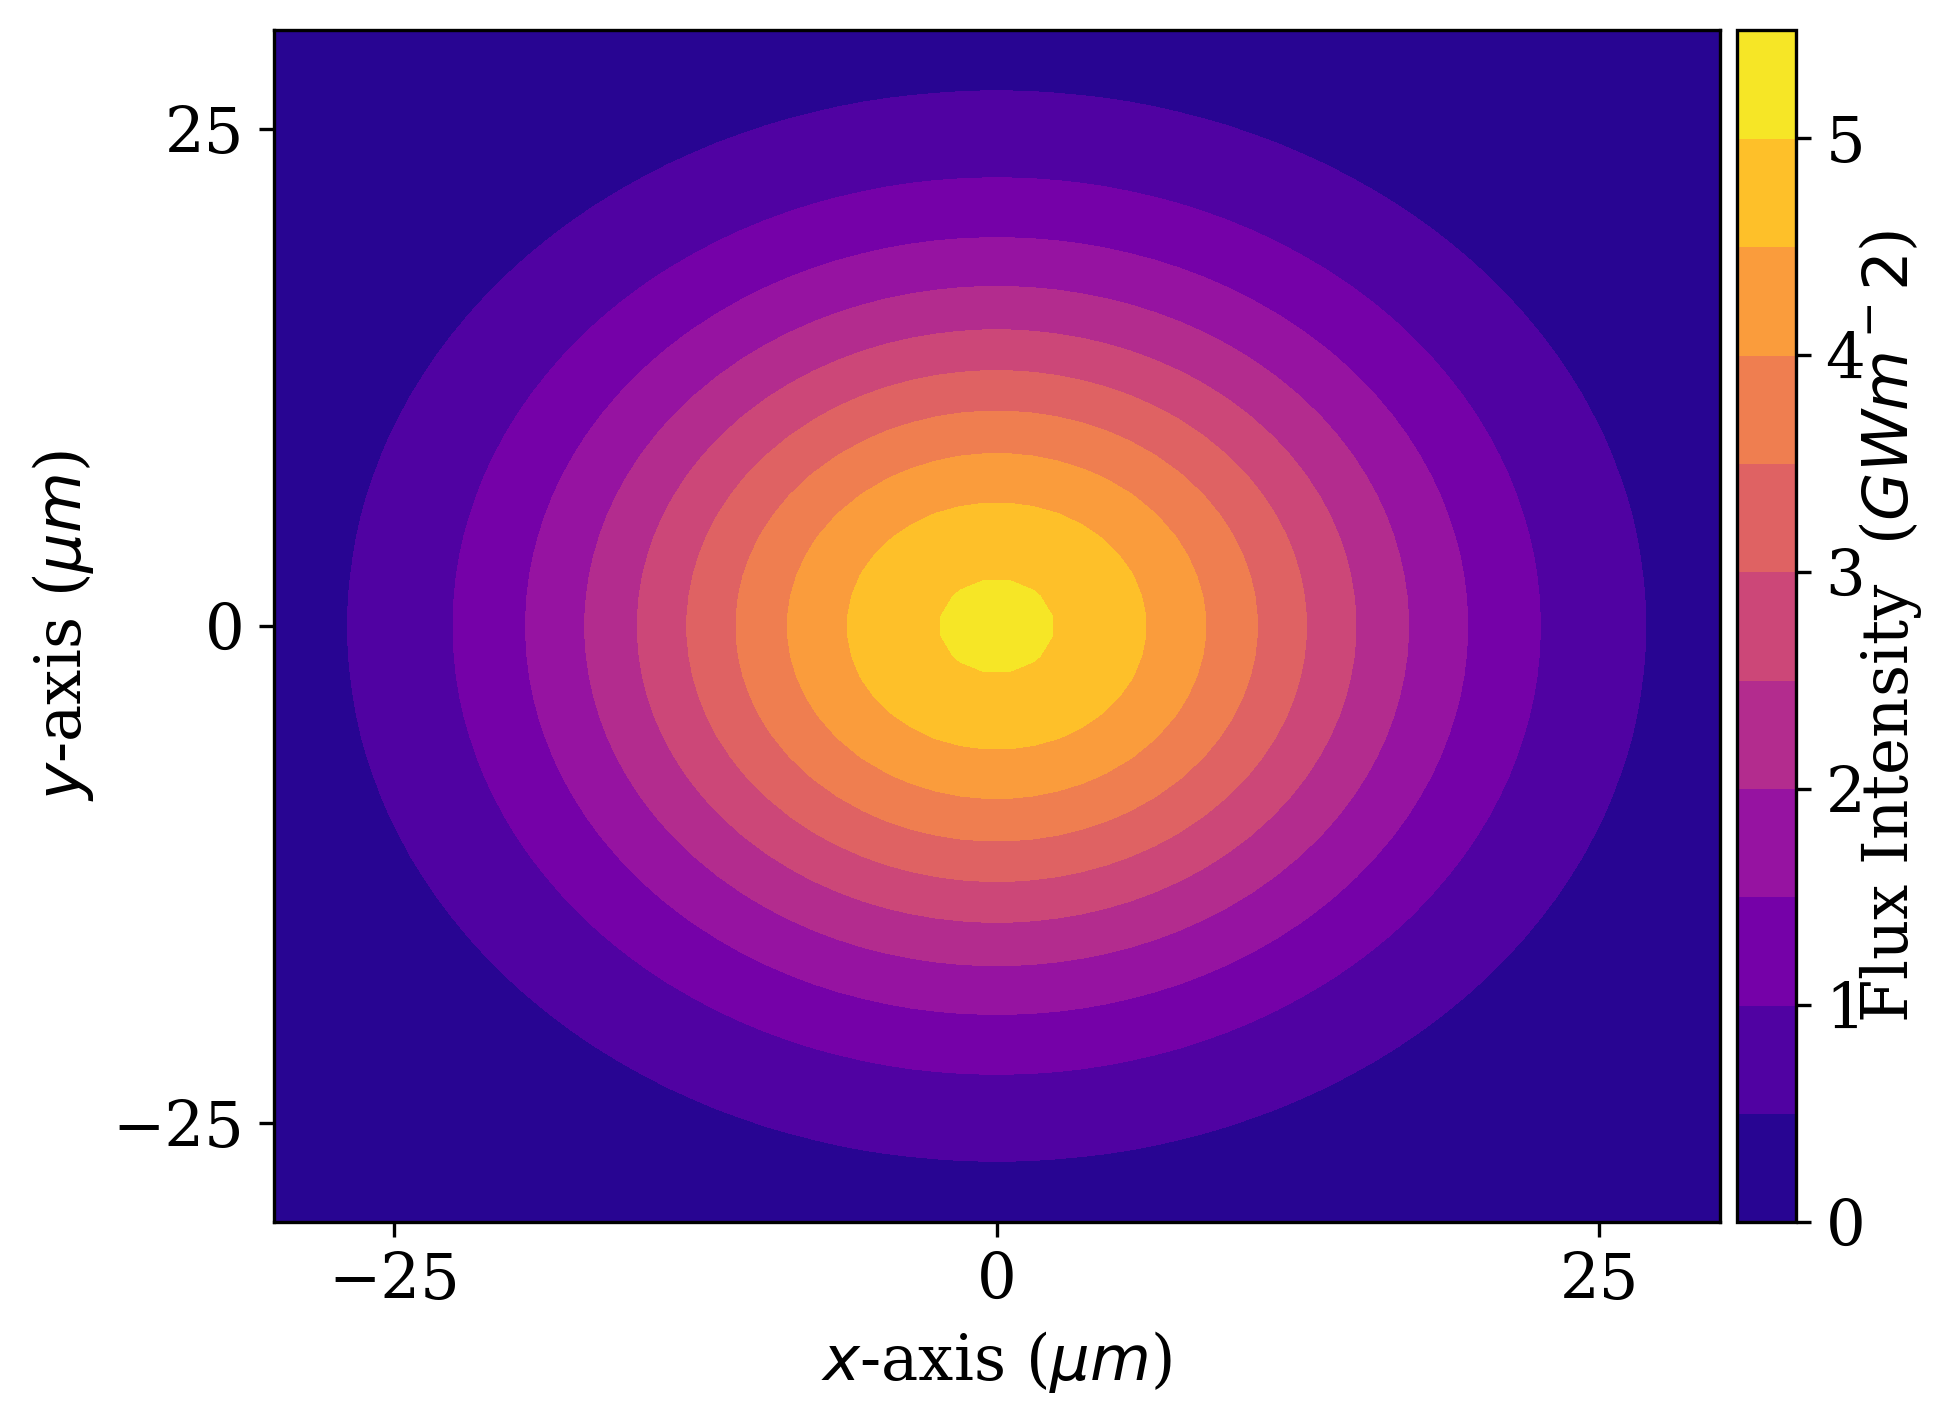

In [20]:
ET_contours = pyplot.figure(figsize = (7,5),dpi=300)
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 15
# levels = 61
ET_contours = pyplot.contourf(x2*1e6,y2*1e6,q1*1e-9, levels = 11, cmap=cm.plasma)
pyplot.xlim(-30,30) ; pyplot.ylim(-30,30)
pyplot.xlabel('$x$-axis ($\mu m$)')
pyplot.ylabel('$y$-axis ($\mu m$)')
cbar_TEM = pyplot.colorbar(ET_contours, pad = 0.01)
cbar_TEM.set_label('Flux Intensity  ($GW m^-2$)',labelpad = -2)
pyplot.xticks([-25,0,25]); pyplot.yticks([-25,0,25])
pyplot.tight_layout()
pyplot.savefig('TEMflux.png')

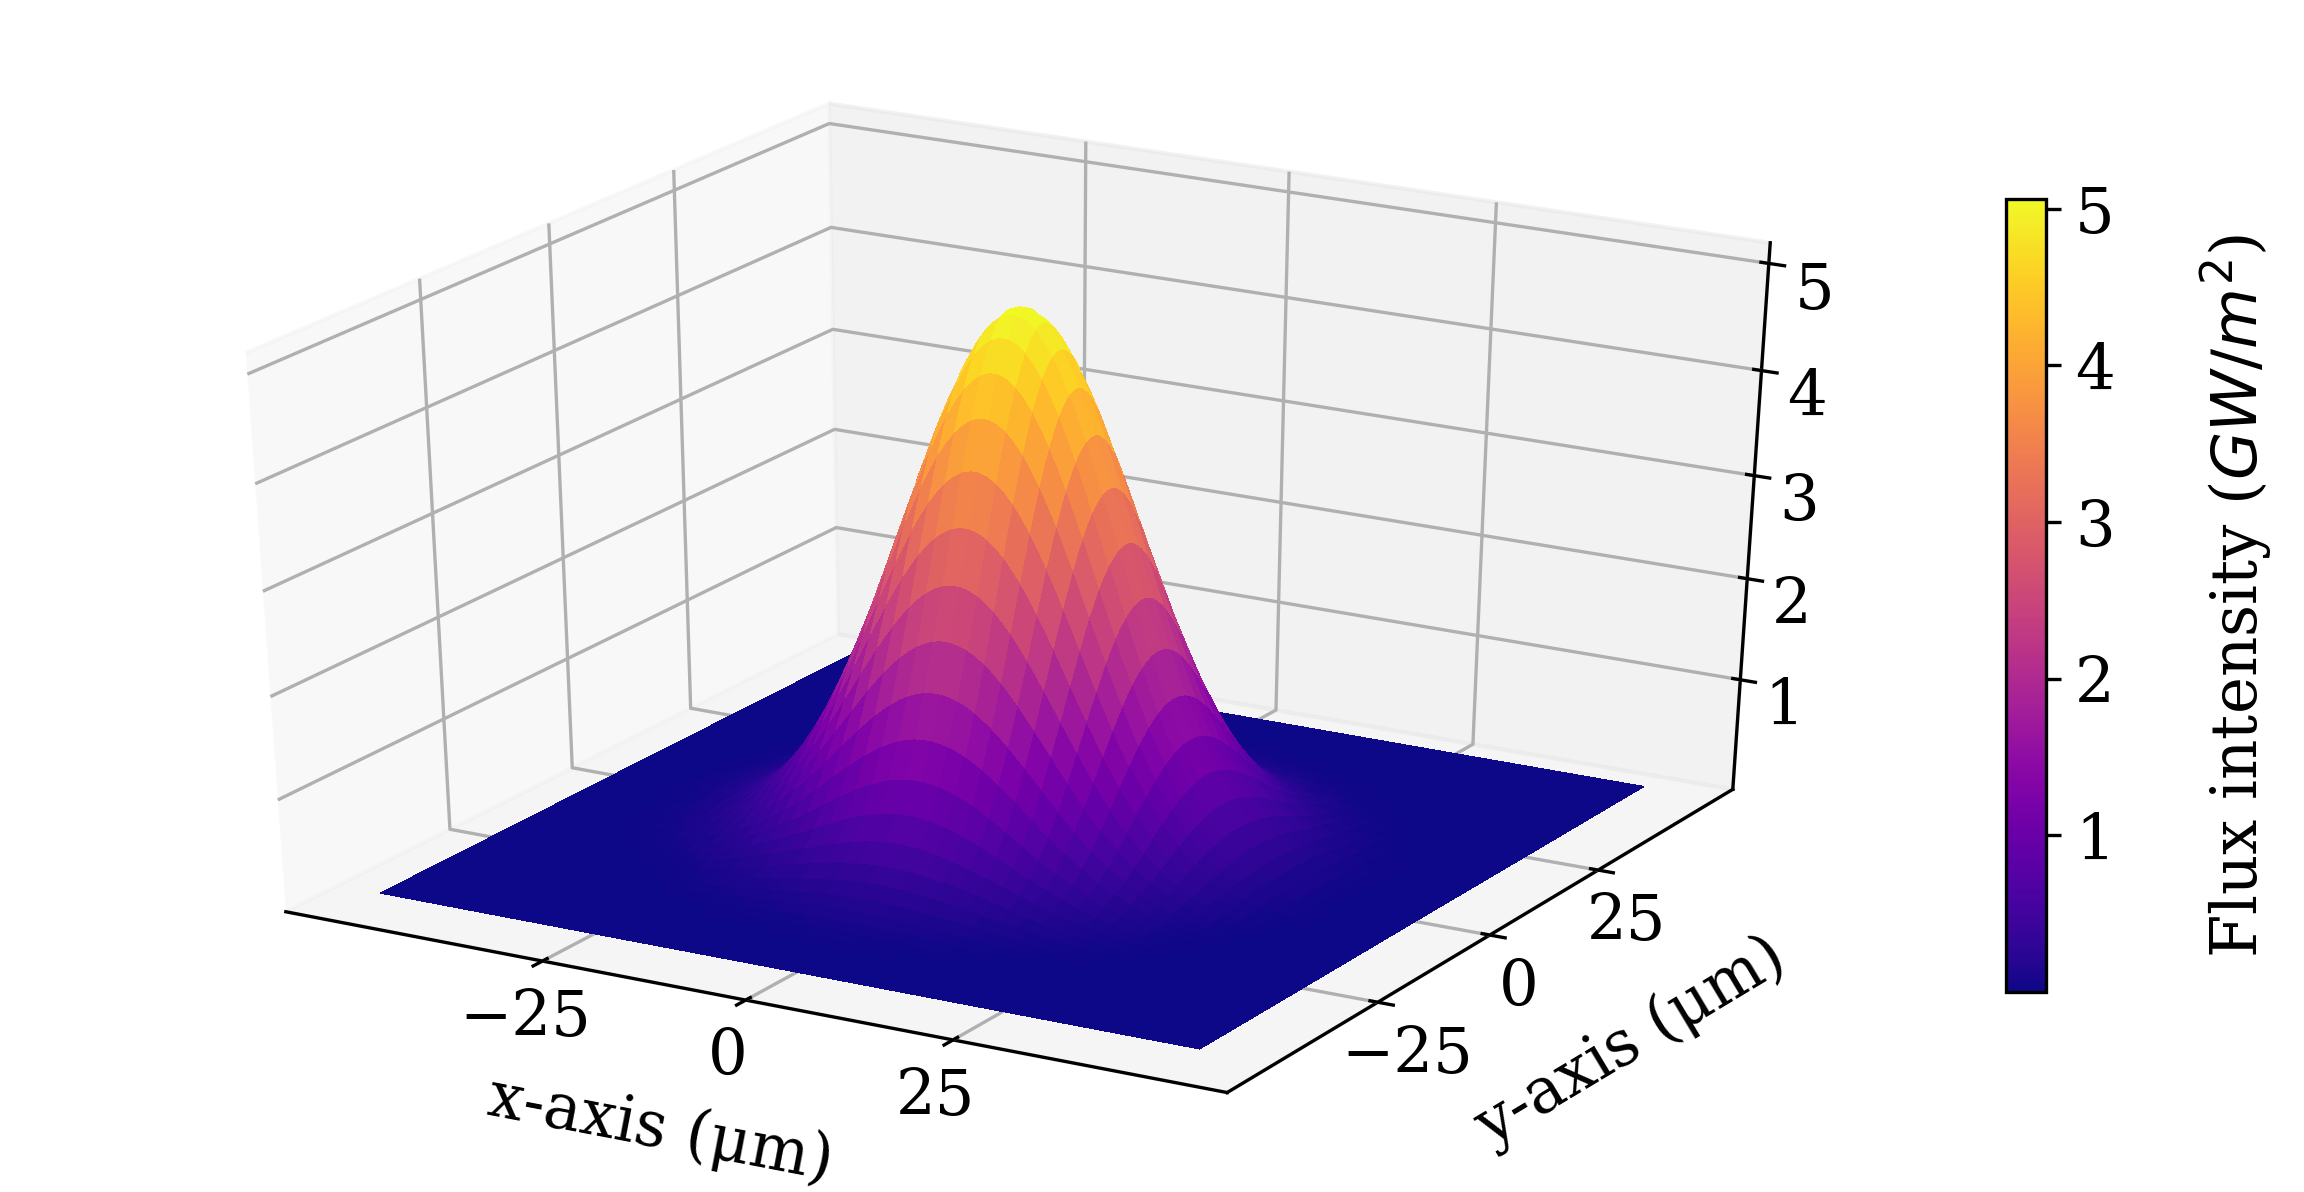

In [17]:
fig = pyplot.figure(figsize = (10,5), dpi =300)
ax = fig.add_subplot(111, projection='3d')
x2, y2 = numpy.meshgrid(x, y)
q1=flux(P,rb,x2,y2,xfocal,yfocal)
con = ax.plot_surface(x2*1e6, y2*1e6, q1*1e-9, cmap=cm.plasma,linewidth=0, antialiased=False)
pyplot.xlabel('x-axis (μm)', labelpad =8); pyplot.ylabel('y-axis (μm)', labelpad = 8)
colorb = fig.colorbar(con, orientation="vertical", fraction = 0.15, shrink = 0.7,pad = 0.02)
colorb.formatter.set_powerlimits((0,0))
pyplot.xticks([-25,0,25]) ;  pyplot.yticks([-25,0,25]) ;
ax.tick_params(axis='both', which='major', pad=-2)
colorb.set_label('Flux intensity ($GW/m^{2}$)', labelpad = 20)
fig.savefig('TEM3D.png')